In [332]:
! pip install -U scikit-learn
import pandas as pd
import datetime
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
import seaborn as sns
import pickle as pkl

Requirement already up-to-date: scikit-learn in /opt/anaconda3/lib/python3.7/site-packages (0.23.1)


In [325]:
sf = pd.read_csv('ca_san_francisco_2020_04_01.csv')

In [326]:
sf = sf.loc[sf.subject_race != 'other',:]

In [327]:
sf.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'search_conducted', 'search_vehicle', 'search_basis', 'reason_for_stop',
       'raw_search_vehicle_description', 'raw_result_of_contact_description'],
      dtype='object')

0         False
1         False
2         False
3         False
4         False
          ...  
905065    False
905066    False
905067    False
905068    False
905069    False
Name: arrest_made, Length: 798212, dtype: bool

In [329]:
race_dummy = pd.get_dummies(sf.subject_race, drop_first=True)
sex_dummy = pd.get_dummies(sf.subject_sex, drop_first=True)
sf = sf.drop(columns = ['raw_row_number','date','outcome','time','type','location','subject_race','subject_sex','lat', 'lng', 'district','citation_issued', 'warning_issued','reason_for_stop',
   'raw_search_vehicle_description', 'raw_result_of_contact_description','search_vehicle','search_basis'], axis=1)
sf.subject_age = sf.subject_age.dropna().apply(lambda x: str(int(x)) )
sf_sparse = pd.concat([sf,race_dummy,sex_dummy],axis=1)
sf_sparse = sf_sparse.dropna()


In [330]:
sf_sparse.head(5)

,subject_age,arrest_made,contraband_found,search_conducted,black,hispanic,white,male
33182,39,True,False,True,0,1,0,1
33185,24,True,True,True,0,1,0,0
33192,24,False,False,True,0,0,1,1
33210,27,False,False,True,0,0,1,1
33211,48,False,False,True,1,0,0,1


In [331]:
sf_sparse.to_pickle("./sf_transformed.pkl")
# sf_sparse = np.reshape(sf_sparse,(-1,1))
# scaler = StandardScaler()
# scaler.fit_transform(sf_sparse.subject_age)
# X = sf_sparse.dropna()
# sf.columns
clf = RandomForestClassifier(max_depth=2, random_state=46)
proto = clf.fit(X, y)
# X.columns

In [266]:
proto.feature_importances_

array([0.56797724, 0.08555343, 0.        , 0.0745499 , 0.12160013,
       0.04227142, 0.10804789])

In [267]:
pd.DataFrame({'Variable':X.columns,
              'Importance':proto.feature_importances_}).sort_values('Importance', ascending=False)

,Variable,Importance
0,subject_age,0.567977
4,hispanic,0.121600
6,male,0.108048
1,contraband_found,0.085553
3,black,0.074550
5,white,0.042271
2,search_conducted,0.000000


Text(0.5, 1.0, 'Feature Importances - Random Forest Classifier')

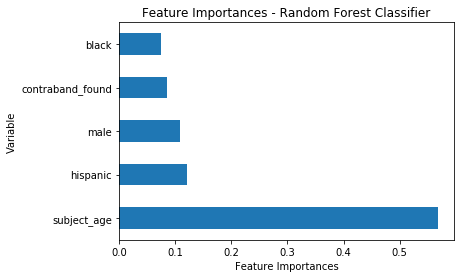

In [268]:
feat_importances = pd.Series(proto.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("Feature Importances")
plt.ylabel("Variable")
plt.title("Feature Importances - Random Forest Classifier")

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [184]:
gnb = GaussianNB()

In [185]:
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [186]:
nb = {
    'Class Count' : gnb.class_count_,
    'Class Prior' : gnb.class_prior_,
}

In [187]:
nb

{'Class Count': array([37177.,   480.]),
 'Class Prior': array([0.98725337, 0.01274663])}

In [188]:
train_score = gnb.score(X_train,y_train)

In [189]:
test_score = gnb.score(X_test,y_test)

In [190]:
train_score

0.9872533659080649

In [191]:
test_score

0.9852363250132767

Text(0.5, 1.0, 'Partial Dependence of Arrest Outcome on\nRace with Random Forest')

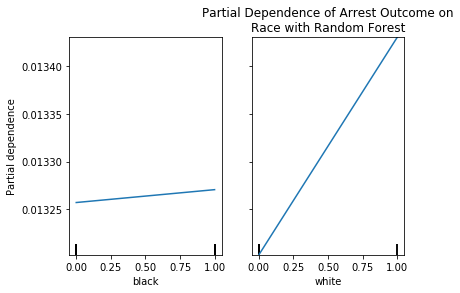

In [192]:
features = [3,5]
pdp = plot_partial_dependence(proto, X, features)
plt.title('Partial Dependence of Arrest Outcome on\n' "Race with Random Forest")

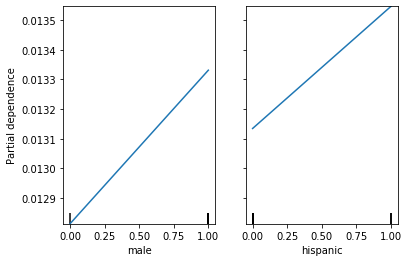

In [193]:
features = [6,4]
pdp = plot_partial_dependence(proto, X, features)

In [270]:
X.subject_age = X.subject_age.astype('int')

In [276]:
X = X.transpose()

In [283]:
lr = LogisticRegression(penalty='l1',random_state=0,solver='liblinear',max_iter=1000).fit(X, y)

In [284]:
lr.score(X,y)

0.9868499320190347

,33182,33185,33192,33210,33211,33224,33236,33246,33262,33277,...,885824,885838,885844,885913,885924,885927,885931,885988,885995,886035
subject_age,39,24,24,27,48,45,22,39,23,47,...,41,64,63,44,59,35,25,30,34,28
contraband_found,False,True,False,False,False,False,False,False,False,False,...,False,True,False,True,True,False,True,False,False,True
search_conducted,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
black,0,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,1
hispanic,1,1,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
white,0,0,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
male,1,0,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,0,1,1
